In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
netflix_dataset=pd.read_csv('combined_data_1.txt',header=None,names=['CustomerId','Rating'],usecols=[0,1])

In [3]:
netflix_dataset.head()

,CustomerId,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [4]:
netflix_dataset.dtypes

CustomerId     object
Rating        float64
dtype: object

In [5]:
netflix_dataset['Rating']=netflix_dataset['Rating'].astype('float')  # to convert to desired datatype

In [6]:
netflix_dataset.shape

(24058263, 2)

In [7]:
starss=netflix_dataset.groupby('Rating').agg(['count']) # this displays customerid also

In [8]:
starss

,CustomerId
,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [9]:
#To find out how many people have rated the movies as 1,2,3,4,5 stars ratings to the movies
stars=netflix_dataset.groupby('Rating')['Rating'].agg(['count'])

In [10]:
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [11]:
#to calculate how many movies we are having in the dataset
movie_count=netflix_dataset.isnull().sum()
movie_count

CustomerId       0
Rating        4499
dtype: int64

In [12]:
movie_count=netflix_dataset.isnull().sum()[1] # this value is number of movies that is present in Rating as NaN values as that denotes the number of movies
movie_count

4499

In [13]:
#get the customer count with unique values along with NaN values 
customer_count=netflix_dataset['CustomerId'].nunique()
customer_count

475257

In [14]:
#without NaN values(subtract with movie count that we took before)
without_nan=customer_count-movie_count
without_nan

470758

In [15]:
rating_c=netflix_dataset['Rating'].nunique()
rating_c

5

In [16]:
#get the total number of ratings given by customers
rating_count=netflix_dataset['CustomerId'].count()-movie_count
rating_count

24053764

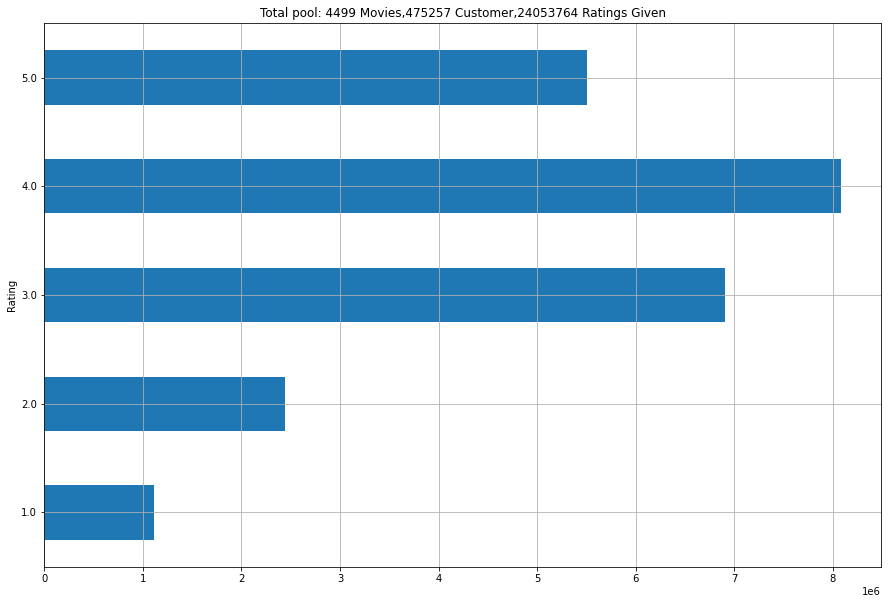

In [17]:
ax=stars.plot(kind='barh',legend=False,figsize=(15,10))
plt.title(f'Total pool: {movie_count} Movies,{customer_count} Customer,{rating_count} Ratings Given')
plt.grid(True)   

In [18]:
# seperate movie id from customer id and put it into seperate column
#add another column that will have movie id
#first of all we will be calculating how many null values i am having in the rating column
df_nan=pd.DataFrame(pd.isnull(netflix_dataset.Rating))

In [19]:
df_nan

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [20]:
df_nan=df_nan[df_nan['Rating']==True]
df_nan.shape

(4499, 1)

In [21]:
#now we will reset the index as the column
df_nan=df_nan.reset_index()
df_nan.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [22]:
x=zip(df_nan['index'][1:],df_nan['index'][:-1])
tuple(x)

((548, 0),
 (694, 548),
 (2707, 694),
 (2850, 2707),
 (3991, 2850),
 (5011, 3991),
 (5105, 5011),
 (20016, 5105),
 (20112, 20016),
 (20362, 20112),
 (20561, 20362),
 (21108, 20561),
 (21234, 21108),
 (21353, 21234),
 (21644, 21353),
 (24344, 21644),
 (31453, 24344),
 (42176, 31453),
 (42716, 42176),
 (42833, 42716),
 (43052, 42833),
 (43256, 43052),
 (43872, 43256),
 (45206, 43872),
 (46414, 45206),
 (52276, 46414),
 (52550, 52276),
 (92303, 52550),
 (92827, 92303),
 (211241, 92827),
 (211463, 211241),
 (213318, 211463),
 (220209, 213318),
 (220318, 220209),
 (221158, 220318),
 (222098, 221158),
 (222380, 222098),
 (223183, 222380),
 (223936, 223183),
 (224428, 223936),
 (224522, 224428),
 (224651, 224522),
 (224757, 224651),
 (233259, 224757),
 (235879, 233259),
 (242438, 235879),
 (244789, 242438),
 (248381, 244789),
 (248613, 248381),
 (248942, 248613),
 (249033, 248942),
 (254181, 249033),
 (254296, 254181),
 (254456, 254296),
 (256863, 254456),
 (258697, 256863),
 (262260, 258697)

In [23]:
y=df_nan['index'][::-1]
y

4498    24057834
4497    24057564
4496    24056849
4495    24047329
4494    24046714
          ...   
4           2850
3           2707
2            694
1            548
0              0
Name: index, Length: 4499, dtype: int64

In [24]:
#now we will create a numpy array that will contain 1 from values 0 to 547 , 2 from 548 to 693
movie_np=[]
movie_id=1
for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    temp=np.full((1,i-j-1),movie_id)
    movie_np=np.append(movie_np,temp)
    movie_id+=1
#account for last record and corresponding length
#numpy approach
last_record=np.full((1,len(netflix_dataset)-df_nan.iloc[-1,0]-1),movie_id)#movie id will be 4499
movie_np=np.append(movie_np,last_record)
print(f'Movie numpy: {movie_np}')
print(f'Length:{len(movie_np)}')

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length:24053764


In [25]:
# iloc[-1,0] - means oth element in -1 index
rec=len(netflix_dataset)-df_nan.iloc[-1,0] 
rec

429

In [26]:
len(df_nan)

4499

In [28]:
#no NaN values 
#only customer values
netflix_dataset=netflix_dataset[pd.notnull(netflix_dataset['Rating'])]
netflix_dataset['movie_id']=movie_np.astype(int)
netflix_dataset['CustomerId']=netflix_dataset['CustomerId'].astype(int)
print("Now the dataset will look like: ")
netflix_dataset.head()

Now the dataset will look like: 


,CustomerId,Rating,movie_id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [ ]:
#data preprocessing is completed till now
#Now , data cleaning :
# we will remove less rating id and the data that are not rated by customer as it will not be usefull for us 

In [30]:
#now we will remove all the users that have rated less movies and
#also all those movies that has been rated less in numbers
f=['count','mean']

In [31]:
#grouping dataset by movie id and used aggregate function of f
dataset_movie_summary=netflix_dataset.groupby('movie_id').agg(f)

In [33]:
dataset_movie_summary
# here count is the number of people who have rated the foll.movie id and mean is the mean of rating values
#In this we will remove the less rated data

CustomerId               Rating          
              count          mean  count      mean
movie_id                                          
1               547  1.249876e+06    547  3.749543
2               145  1.341926e+06    145  3.558621
3              2012  1.324290e+06   2012  3.641153
4               142  1.402854e+06    142  2.739437
5              1140  1.302384e+06   1140  3.919298
...             ...           ...    ...       ...
4495            614  1.321093e+06    614  3.478827
4496           9519  1.332006e+06   9519  3.763000
4497            714  1.330543e+06    714  2.715686
4498            269  1.262035e+06    269  2.464684
4499            428  1.270551e+06    428  2.614486

[4499 rows x 4 columns]

In [35]:
#to have data only for rating  column
dataset_movie_summary=netflix_dataset.groupby('movie_id')['Rating'].agg(f)

In [36]:
dataset_movie_summary
#mean value for rating column

,count,mean
movie_id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
...,...,...
4495,614,3.478827
4496,9519,3.763000
4497,714,2.715686


In [38]:
#now we will store all the movie_id indexes in a variable dataset_movie_summary.index 
#index values are nothing but movie id
#we use map here to make it as int
dataset_movie_summary.index=dataset_movie_summary.index.map(int)

In [39]:
dataset_movie_summary.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            4490, 4491, 4492, 4493, 4494, 4495, 4496, 4497, 4498, 4499],
           dtype='int64', name='movie_id', length=4499)

In [40]:
#now we will create a benchmark
#benchmark is to set some values , below this category we will not consider , only above this we will conside
#quantile function is used to make 70:30 ratio(0.7)[if 50 % then (0.5)]- we do this to avoid less number values
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.7),0)#rounded by 0
movie_benchmark

1799.0

In [42]:
dataset_movie_summary['count']# here these are the number of ratings given for resp. movies , so this will not be helpful

movie_id
1        547
2        145
3       2012
4        142
5       1140
        ... 
4495     614
4496    9519
4497     714
4498     269
4499     428
Name: count, Length: 4499, dtype: int64

In [43]:
#to compare with benchmark and try to have data that are less than benchmark value
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list

Int64Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
            ...
            4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
           dtype='int64', name='movie_id', length=3149)

In [46]:
#now we will remove all the users that are inactive
#here count is the number of ratings that has been given by users
#these are the less number of rating count
dataset_cust_summary=netflix_dataset.groupby('CustomerId')['Rating'].agg(f)
dataset_cust_summary

,count,mean
CustomerId,,
6,153,3.333333
7,195,4.066667
8,21,4.000000
10,49,3.346939
25,4,3.500000
...,...,...
2649404,12,4.083333
2649409,10,4.000000
2649421,3,5.000000


In [47]:
dataset_cust_summary.index=dataset_cust_summary.index.map(int)

In [49]:
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.7),0)
cust_benchmark

52.0

In [51]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Int64Index([      8,      10,      25,      33,      42,      59,      83,
                 87,      94,     116,
            ...
            2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401,
            2649404, 2649409, 2649421],
           dtype='int64', name='CustomerId', length=327300)

In [52]:
#we will remove all the customers and movies that are below the benchmark
print("The original dataframe has: ",netflix_dataset.shape,'shape')

The original dataframe has:  (24053764, 3) shape


In [54]:
netflix_dataset=netflix_dataset[~netflix_dataset['movie_id'].isin(drop_movie_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['CustomerId'].isin(drop_cust_list)]
print('After the trimming , the shape is: {}'.format(netflix_dataset.shape))

After the trimming , the shape is: (17337458, 3)


In [55]:
netflix_dataset.head()

,CustomerId,Rating,movie_id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [56]:
#now we will prepare dataset for SVD algorithm [ Singular value decomposition][used for decomposing data][we will create recommendation engine using SVD alg]
# we have to use sparse matrix data in SVD algorithm not the dataframe

#now we will prepare the dataset for SVD and it takes the matrix as the input
#so for input, we will convert the dataset into sparse matrix
df_p=pd.pivot_table(netflix_dataset,values='Rating',index='CustomerId',columns='movie_id')
print(df_p.shape)

(143458, 1350)


In [57]:
df_p.head()

movie_id,3,8,16,17,18,26,28,30,32,33,...,4472,4474,4478,4479,4485,4488,4490,4492,4493,4496
CustomerId,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,...,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
#ISO-8859-1 is used for accepting the special characters
df_title=pd.read_csv('movie_titles.csv',encoding='ISO-8859-1',header=None,names=['movie_id','Year','Name'])
df_title.set_index('movie_id',inplace=True)

In [85]:
df_title.head(10)

,Year,Name
movie_id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


In [86]:
#model building
import math
import re
from scipy.sparse import csr_matrix
import seaborn as sns
from surprise import Reader, Dataset,SVD   # to read the dataset for SVD model
from surprise.model_selection import cross_validate

In [87]:
#help us to read dataset for svd algo
reader=Reader()

In [88]:
#We only work with top 100k rows for quick runtime
data=Dataset.load_from_df(netflix_dataset[['CustomerId','movie_id','Rating']][:100000],reader)

In [89]:
#RMSE - Root , Mean , Square,Error
#MAE - Mean, Absolute,Error
svd=SVD()
cross_validate(svd,data,measures=['RMSE','MAE'],cv=3,verbose=True)
#for RMSE - it will accept val
#for 1st fold- 1,2,3
# this has 3 folds -CustomerId,movie_id,Rating
#Fold 1 will be as testing data and other folds are training data , same as like fr 3 folds also

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0014  0.9973  0.9937  0.9975  0.0031  
MAE (testset)     0.8025  0.7994  0.7927  0.7982  0.0041  
Fit time          17.85   12.54   12.33   14.24   2.55    
Test time         1.20    0.65    0.83    0.89    0.23    


{'test_rmse': array([1.0013872 , 0.99729486, 0.99373966]),
 'test_mae': array([0.80250568, 0.79941565, 0.79267237]),
 'fit_time': (17.84564471244812, 12.54075288772583, 12.329035520553589),
 'test_time': (1.2037320137023926, 0.6455113887786865, 0.8316709995269775)}

In [90]:
netflix_dataset.head()

,CustomerId,Rating,movie_id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [91]:
#so first we take user 712664 and we try to recommend some movies based on the past data
dataset_712664=netflix_dataset[(netflix_dataset['CustomerId']==712664)&(netflix_dataset['Rating']==5)]
dataset_712664=dataset_712664.set_index('movie_id')
dataset_712664=dataset_712664.join(df_title)['Name']
dataset_712664

movie_id
3                       Character
79                    The Killing
175                Reservoir Dogs
199               The Deer Hunter
241            North by Northwest
                  ...            
3887    Aguirre: The Wrath of God
4109              American Psycho
4266    The Passion of the Christ
4384             Dawn of the Dead
4392             Army of Darkness
Name: Name, Length: 84, dtype: object

In [92]:
#now we will build the recommendation  algorithm
#first we will make a shallow copy of the movie_titles.csv file 
user_712664=df_title.copy()
user_712664

,Year,Name
movie_id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [93]:
#to make movie_id as index
user_712664=user_712664.reset_index()
user_712664

,movie_id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [94]:
#to eliminate movie id in drop_movie_list
user_712664=user_712664[~user_712664['movie_id'].isin(drop_movie_list)]
user_712664

,movie_id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [95]:
#now we will train our algorithm with the whole dataset
data=Dataset.load_from_df(netflix_dataset[['CustomerId','movie_id','Rating']],reader)

In [96]:
#building the trainset using surprise package
trainset=data.build_full_trainset()
svd.fit(trainset)

In [97]:
user_712664['Estimate_Score']=user_712664['movie_id'].apply(lambda x: svd.predict(712664,x).est)
user_712664=user_712664.drop('movie_id',axis=1)

<ipython-input-97-040b6ad1a98b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_712664['Estimate_Score']=user_712664['movie_id'].apply(lambda x: svd.predict(712664,x).est)


In [98]:
user_712664=user_712664.sort_values('Estimate_Score')
print(user_712664.head(10))

        Year                                      Name  Estimate_Score
4172  1998.0  From Dusk Till Dawn 2: Texas Blood Money        1.053565
1601  2000.0                        Dungeons & Dragons        1.065029
361   2000.0        The Flintstones in Viva Rock Vegas        1.098750
2275  1998.0                               Spice World        1.148746
224   2004.0                               The Cookout        1.181757
3020  2003.0                         House of the Dead        1.206892
730   1997.0                                 Mr. Magoo        1.263207
2971  2002.0                         American Psycho 2        1.305577
2336  1997.0                               Double Team        1.341630
1292  1996.0     Children of the Corn 4: The Gathering        1.350341


In [99]:
user_712664=user_712664.sort_values('Estimate_Score',ascending=False)
print(user_712664.head(10))

        Year                                      Name  Estimate_Score
4352  2002.0            Curb Your Enthusiasm: Season 3        5.000000
174   1992.0                            Reservoir Dogs        5.000000
995   1961.0                                   Yojimbo        5.000000
871   1954.0                             Seven Samurai        5.000000
3119  1955.0                                    Rififi        5.000000
4053  1990.0  House of Cards Trilogy I: House of Cards        5.000000
721   2003.0                        The Wire: Season 1        5.000000
3289  1974.0                             The Godfather        5.000000
2101  1994.0                    The Simpsons: Season 6        4.987556
32    2000.0            Aqua Teen Hunger Force: Vol. 1        4.962977
